# 이미지 데이터 증강(Image Data Augmentation)
- 이미지 데이터셋을 확장하고 모델의 일반화 성능을 높이기 위해 원본 이미지에서 다양한 변형을 생성하는 기법
- 이 과정은 모델이 제한된 데이터셋으로 학습하더라도 더 많은 양의 데이터를 활용하는 효과를 줄 수 있음
- 이미지 증강을 통해 데이터셋의 크기가 증가하고 다양성이 높아져, 모델이 오버피팅을 줄이고 예측 성능을 개선할 수 있음
- 주요 이미지 증강 방법
    - 회전(Rotation)
    > 이미지를 임의의 각도로 회전시켜 다양한 각도에서 물체를 학습할 수 있도록 한다.
    - 수평/수직 뒤집기(Flipping)
    > 이미지의 좌우나 상하를 뒤집어 다양한 시각에서 학습을 촉진한다.
    - 자르기(Cropping)
    > 이미지의 일부를 잘라내어 모델이 물체의 일부분만으로도 인식할 수 있도록 도와준다.
    - 크기 조정(Scaling)
    > 이미지를 크거나 작게 확대 및 축소하여 다양한 비율의 객체를 학습할 수 있도록 한다.
    - 색상 조정(Color Jittering)
    > 색상, 밝기, 대비를 변경하여 조명이나 환경이 달라지는 상황에 대한 견고성을 높인다.
    - 노이즈 추가(Adding Noise)
    > 이미지에 랜덤 노이즈를 추가하여 모델이 데이터의 잡음에도 강인하도록 학습한다.

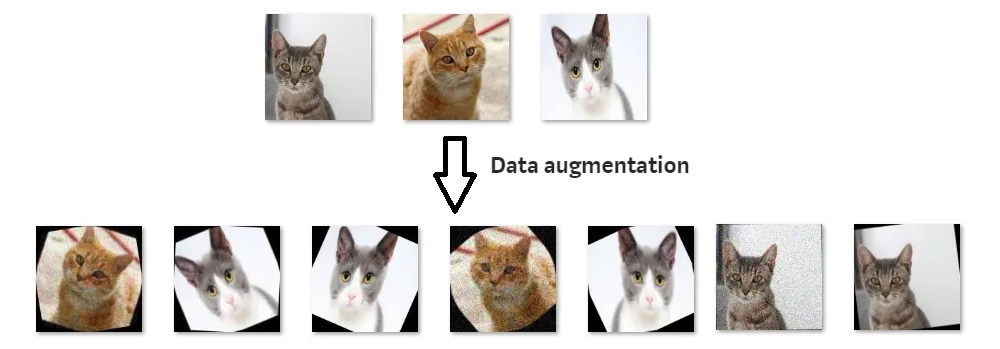

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
SEED = 42

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
from glob import glob

In [4]:
cats_list = sorted(glob("../data/cats_and_dogs/train/cats/*.jpg"))
dogs_list = sorted(glob("../data/cats_and_dogs/train/dogs/*.jpg"))

len(cats_list), len(dogs_list)

(1000, 1000)

- 정답 데이터 만들기
    - 고양이: 0
    - 개 : 1
    

In [5]:
img_path = cats_list + dogs_list
labels = [0] * 1000 + [1] * 1000

train_path = np.array(img_path)
target = np.array(labels)

In [6]:
train_path

array(['../data/cats_and_dogs/train/cats\\cat.0.jpg',
       '../data/cats_and_dogs/train/cats\\cat.1.jpg',
       '../data/cats_and_dogs/train/cats\\cat.10.jpg', ...,
       '../data/cats_and_dogs/train/dogs\\dog.997.jpg',
       '../data/cats_and_dogs/train/dogs\\dog.998.jpg',
       '../data/cats_and_dogs/train/dogs\\dog.999.jpg'], dtype='<U44')

In [7]:
target

array([0, 0, 0, ..., 1, 1, 1])

# 섞기

In [8]:
np.random.seed(SEED)
idx_list = np.arange(train_path.shape[0])

np.random.shuffle(idx_list)
np.random.shuffle(idx_list)

train_path = train_path[idx_list]
target = target[idx_list]

- 이진분류 문제에서 주의할 점(pytorch)
    - 정답데이터는 2차원 형태이고, 데이터 타입은 float32 형태 여야 한다.

In [9]:
target = target.reshape(-1,1)
target.shape

(2000, 1)

In [10]:
import cv2

img = cv2.imread(train_path[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# albumentations 라이브러리
- 설치하기
```bash
pip install albumentations
```

In [13]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

## ToTensorV2 클래스
- 이미지 데이터를 Channel, Height, Width 형태의 텐서로 변환
- ndarray전달해야 함
- 스케일링 x

In [14]:
aug = ToTensorV2()
aug(image=img)

{'image': tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)}

In [15]:
aug(image=img)["image"].shape

torch.Size([3, 500, 460])

## Normalize 클래스
- 정규화
- `img = (img - mean * 255) / (std * 255)`

In [16]:
aug = A.Normalize()
aug(image=img)["image"]

array([[[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999]],

       ...,

       [[2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        [2.2489083, 2.4285712, 2.6399999],
        ...,
        [2.2489083, 2.4285

- min-max scaling

In [17]:
aug = A.Normalize(mean=0, std=1)
aug(image=img)["image"]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

# Resize 클래스

In [18]:
aug = A.Resize(150, 150) # height, width
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## HorizontalFlip 클래스
- 좌우반전

In [19]:
aug = A.HorizontalFlip(p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## VerticalFlip 클래스
- 상하반전

In [20]:
aug = A.VerticalFlip(p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# ToGray 클래스
- 이미지 흑백 변환

In [21]:
aug = A.ToGray(p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Perspective 클래스
- 원근 변환

In [22]:
aug = A.Perspective(p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 232, 249],
        [249, 254, 248],
        [249, 255, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [221, 222, 245],
        [249, 254, 248],
        [250, 255, 233]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [200, 200, 233],
        [248, 251, 249],
        [252, 255, 235]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## InvertImg 클래스
- 색상반전

In [23]:
aug = A.InvertImg(p=1)
aug(image=img)["image"]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Posterize 클래스
- 이미지 포스터화
- num_bits 파라미터

In [25]:
aug = A.Posterize(p=1, num_bits=3)
aug(image=img)["image"]

array([[[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       ...,

       [[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]],

       [[224, 224, 224],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [224, 224, 224],
        [224, 224, 224],
        [224, 224, 224]]

## Equalize 클래스
- 이미지 히스토그램 균등화

In [26]:
aug = A.Equalize(p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## CenterCrop 클래스
- 중앙 크롭

In [27]:
aug = A.CenterCrop(300, 300, p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [175,  20,  36],
        [106,  16,  16],
        [ 54,  14,   4]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [207,  17,  43],
        [150,  15,  29],
        [ 83,   5,   5]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [220,  22,  45],
        [174,  22,  34],
        [102,   2,   4]]

## RandomResizedCrop 클래스
- 랜덤으로 크롭 후 지정한 사이즈로 리사이즈

In [28]:
aug = A.RandomResizedCrop(size=(150, 150), p=1)
aug(image=img)["image"]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  7,   5,   6],
        [  6,   4,   5],
        [  4,   2,   3]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  4,   2,   3],
        [  3,   2,   2],
        [  7,   5,   6]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  5,   3,   4],
        [  3,   1,   2],
        [  6,   4,   5]]

## Affine 클래스
- 아핀 변환

In [29]:
aug = A.Affine(p=1)
aug(image=img)["image"]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [46]:
resize = [150, 150] # height, width

train_list = [
    A.HorizontalFlip(p=0.5), # 50% 확률로 좌우반전(증강효과)
    A.Affine(p=0.5),
    A.Resize(*resize), # 리사이징
    A.Normalize(), # 정규화
    ToTensorV2() # 텐서로 변환(channel, height, width)
]

train_transform = A.Compose(train_list)

test_list = [
    A.Resize(*resize),
    A.Normalize(),
    ToTensorV2()
]

test_transform = A.Compose(test_list)

# 데이터셋 클래스

In [47]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, transform, x, y=None):
        self.transform = transform
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, i):
        item = {}
        x = cv2.imread(self.x[i])
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        item["x"] = self.transform(image=x)["image"]
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [48]:
dataset = CatDogDataset(train_transform, train_path, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
batch

{'x': tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           ...,
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],
 
          [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],
 
          [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
        

In [49]:
batch["x"].shape

torch.Size([2, 3, 150, 150])

In [50]:
batch["x"].dtype, batch["y"].dtype

(torch.float32, torch.float32)

# 모델 클래스

In [51]:
class Net(torch.nn.Module):
    def __init__(self, out_channel=16, kernel_size=3):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(3, out_channel, kernel_size),
            torch.nn.BatchNorm2d(out_channel),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.Conv2d(out_channel, out_channel*2, kernel_size),
            torch.nn.BatchNorm2d(out_channel*2),
            torch.nn.ELU(),
            torch.nn.MaxPool2d(2),

            torch.nn.AdaptiveMaxPool2d(1), # batch, channel, height, width -> batch, channel, 1, 1
            torch.nn.Flatten(),  # batch, channel, 1, 1 -> batch, channel
            torch.nn.Linear(out_channel*2, 1) # output layer
        )

    def forward(self, x):
        return self.seq(x)

In [52]:
Net()(batch["x"])

tensor([[2.4050],
        [1.7358]], grad_fn=<AddmmBackward0>)

# 학습 loop 함수

In [53]:
def train_loop(dl, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train()
    for batch in dl:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dl)
    return epoch_loss

# 테스트 loop 함수

In [54]:
@torch.no_grad()
def test_loop(dl, model, loss_fn, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dl:
        pred = model( batch["x"].to(device) )
        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dl)
    return epoch_loss, pred

# 하이퍼파라미터

In [55]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [57]:
DATA_PATH = "../output/"

In [58]:
is_holdout = False
reset_seeds(SEED)
score_list = []
for i, (tri, vai) in enumerate(cv.split(train_path)):
    # 학습 데이터
    x_train = train_path[tri]
    y_train = target[tri]
    train_dt = CatDogDataset(train_transform, x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    # 검증 데이터
    x_valid = train_path[vai]
    y_valid = target[vai]
    valid_dt = CatDogDataset(test_transform, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net().to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고점수
    for _ in range(epochs):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(y_valid, pred)
        patience += 1

        if score > best_score:
            best_score = score
            patience = 0
            torch.save( model.state_dict(), f"{DATA_PATH}model{i}.pt" )

        if patience == 5:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    if is_holdout:
        break

ACC 최고점수: 0.805
ACC 최고점수: 0.67
ACC 최고점수: 0.74
ACC 최고점수: 0.7425
ACC 최고점수: 0.7675


In [59]:
np.mean(score_list)

0.745

In [61]:
cats_test_list = sorted( glob("../data/cats_and_dogs/test/cats/*.jpg") ) # 0
dogs_test_list = sorted( glob("../data/cats_and_dogs/test/dogs/*.jpg") ) # 1

test_path = np.array(cats_test_list + dogs_test_list)
test_path

array(['../data/cats_and_dogs/test/cats\\cat.1000.jpg',
       '../data/cats_and_dogs/test/cats\\cat.1001.jpg',
       '../data/cats_and_dogs/test/cats\\cat.1002.jpg', ...,
       '../data/cats_and_dogs/test/dogs\\dog.1997.jpg',
       '../data/cats_and_dogs/test/dogs\\dog.1998.jpg',
       '../data/cats_and_dogs/test/dogs\\dog.1999.jpg'], dtype='<U44')

In [62]:
y_test = np.array([0] * len(cats_test_list) + [1] * len(dogs_test_list))
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
test_dt = CatDogDataset(test_transform, test_path)
test_dl = torch.utils.data.DataLoader(test_dt, shuffle=False, batch_size=batch_size)

In [65]:
pred_list = []
for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(f"{DATA_PATH}model{i}.pt", weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, None, device)
    pred_list.append(pred)

In [66]:
pred = np.mean(pred_list, axis=0)
pred = (pred > 0.5).astype(int)
pred.shape

(2000, 1)

In [67]:
accuracy_score(y_test, pred)

0.7495

# TTA(Test Time Augmentation)
- 딥러닝 모델의 성능을 향상시키기 위해 테스트 단계에서 이미지에 다양한 변형을 가하는 기법
- 테스트 이미지에 증강을 적용하여 예측하는 기법

In [68]:
aug_list = [A.HorizontalFlip(p=1), A.Affine(p=1)]
tta_pred_list = []

for aug_obj in aug_list:
    lst = [
        aug_obj,
        A.Resize(*resize),
        A.Normalize(),
        ToTensorV2()
    ]

    transform = A.Compose(lst)
    test_dataset = CatDogDataset(transform, test_path)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for i in range(n_splits):
        model = Net().to(device)
        state_dict = torch.load(f"{DATA_PATH}model{i}.pt", weights_only=True)
        model.load_state_dict(state_dict)

        _, pred = test_loop(test_dataloader, model, None, device)
        tta_pred_list.append(pred)

In [71]:
len(pred_list + tta_pred_list)

15

In [72]:
preds = pred_list + tta_pred_list
pred = np.mean(preds, axis=0)
pred = np.where(pred > 0.5, 1, 0)
pred.shape

(2000, 1)

In [73]:
accuracy_score(y_test, pred)

0.745